In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable
import numpy as np
import math
import time
import cv2

In [22]:
def curv():
    return 1
w,h = 6000, 4000
p = np.polyfit([0, 4000], [200, 100], deg=2)
np.polyval(p, 0)

image = np.zeros((h, w), dtype=np.float64)
for r in range(h):
    for c in range(w):
        image[r, c] = np.polyval(p, np.sqrt((r-h//2)**2+(c-w//2)**2))

print(image.max())
print(image.min())
print(image.shape)

C:\Users\iwewa\AppData\Local\Temp\ipykernel_17424\2387068553.py:4: RankWarning: Polyfit may be poorly conditioned
  p = np.polyfit([0, 4000], [200, 100], deg=2)


200.0
114.30560905670013
(4000, 6000)


In [25]:
def show_image(img, title='raw iamge'):
    # img = img.transpose((1, 2, 0)).astype(np.uint8)
    fig = plt.figure(figsize=(5, 5))
    ax = plt.axes()
    
    ax.set_title(title)
    ax.set_xlabel('Horizontal axis (pixel)')
    ax.set_ylabel('Vertical axis (pixel)')
    
    im = ax.imshow(img)
    divider = make_axes_locatable(ax)
    cax = divider.append_axes("right", size="5%", pad=0.1)
    plt.colorbar(im, cax=cax, label='graylevel');

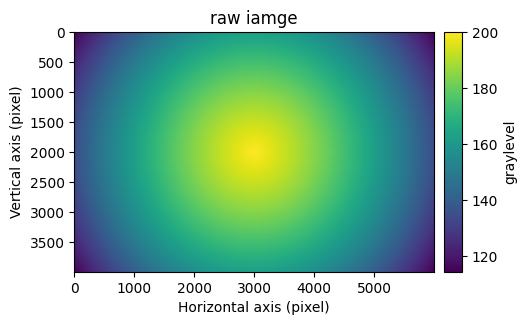

In [26]:
show_image(image)

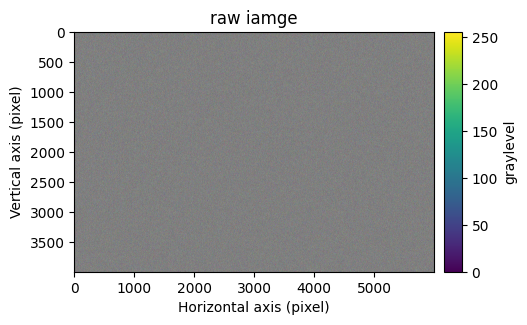

In [9]:
w, h = 6000, 4000
bitdepth=10
gray_min = 0
gray_max = 2**bitdepth
x = np.random.randint(gray_min, gray_max,size=(h, w))
y = np.random.randint(gray_min, gray_max,size=(h, w))
z = np.random.randint(gray_min, gray_max,size=(h, w))

tristi = np.stack([x, y, z])



show_image(tristi)

In [10]:
def correct_color(R, img):
    c, h, w = img.shape
    s = time.time()
    res = np.matmul(R, img.reshape(c, h*w)).reshape(c, h, w)
    e = time.time()
    print(f'time used: {e-s}')
    return np.clip(res, 0.0, 255.0)

In [11]:
R = np.array([[1.0, 0, 0], [0, 1.0, 0], [0, 0, 1.0]])
Rr = np.array([[1.0, 0, 0], [0, 0, 0], [0, 0, 0]])
Rg = np.array([[0, 0, 0], [0, 1.0, 0], [0, 0, 0]])
Rb = np.array([[0, 0, 0], [0, 0, 0], [0, 0, 1.0]])
Rrg = np.array([[1.0, 0, 0], [0, 1.0, 0], [0, 0, 0]])

time used: 0.23649930953979492


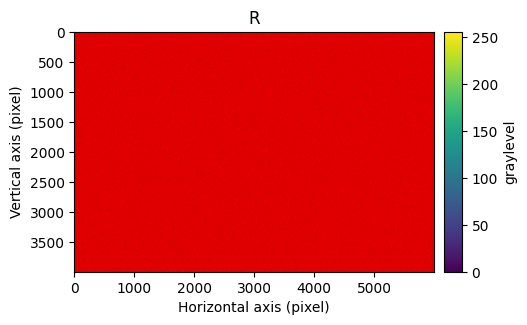

In [12]:
res = correct_color(Rr, tristi)
show_image(res, 'R')

time used: 0.2275540828704834


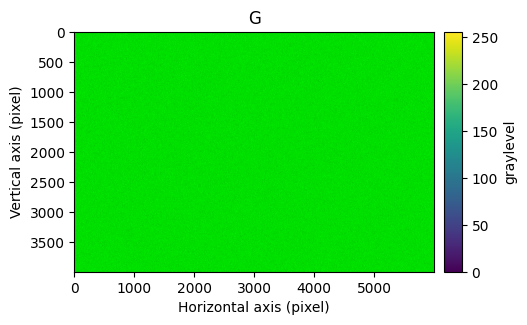

In [13]:
res = correct_color(Rg, tristi)
show_image(res, 'G')

time used: 0.2477097511291504


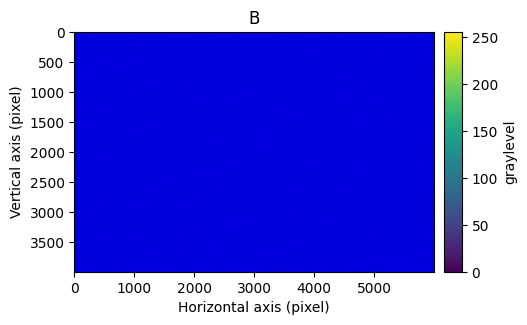

In [14]:
res = correct_color(Rb, tristi)
show_image(res, 'B')